In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
bacteria_data = pd.read_csv('park_bacterial_growth.csv',skiprows = 2)

In [4]:
bacteria_data.head()

,bacterial area (sq. microns),time (hr)
0,5.574735,0.00
1,5.712023,0.25
2,5.903395,0.50
3,6.194612,0.75
4,6.456708,1.00


In [25]:
x = [1, 2, 3, 4]
len(x)
index = np.array([0,len(x)-1])
index = list(range(len(x)))
index

[0, 1, 2, 3]

In [26]:

def draw_bs_par_linreg(x, y, size = 1):
    slope_reps = np.empty(size)
    intercept_reps = np.empty(size)
    index = list(range(len(x)))
    for i in range(size):
        bs_index = np.random.choice(index, size = len(index))
        x_bs, y_bs = x[bs_index], y[bs_index]
        slope_reps[i], intercept_reps[i] = np.polyfit(x_bs, y_bs, 1)
    return slope_reps, intercept_reps

In [5]:
bac_area = bacteria_data['bacterial area (sq. microns)'].values
t = bacteria_data['time (hr)'].values

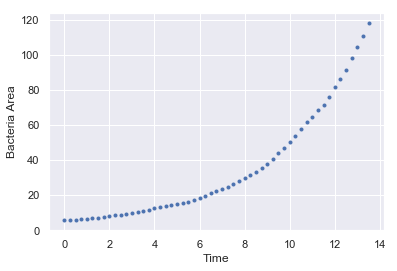

In [9]:
_ = plt.plot(t, bac_area, marker = '.', linestyle = 'none')
_ = plt.xlabel('Time(hr)')
_ = plt.ylabel('Bacteria Area(sq Microns)')
plt.show()

As we can see that the above relationship cannot be quantofy by a linear model so we will use log on y axis

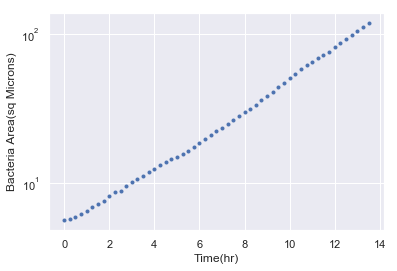

In [10]:
_ = plt.semilogy(t, bac_area, marker = '.', linestyle = 'none') #it converts y axis into log
_ = plt.xlabel('Time(hr)')
_ = plt.ylabel('Bacteria Area(sq Microns)')
plt.show()

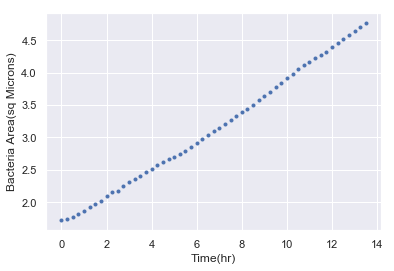

In [14]:
# or we can use this method
_ = plt.plot(t, np.log(bac_area), marker = '.', linestyle = 'none')
_ = plt.xlabel('Time(hr)')
_ = plt.ylabel('Bacteria Area(sq Microns)')
plt.show()

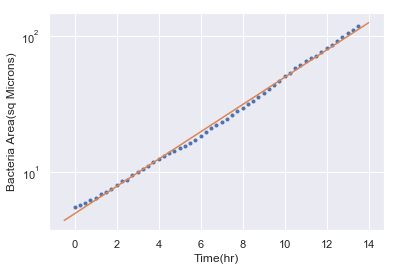

In [15]:
growthRate, intercept = np.polyfit(t, np.log(bac_area), 1)
t_theor = np.array([min(t)-0.5, max(t)+0.5])
bac_area_theor = np.exp(growthRate*t_theor + intercept)

_ = plt.semilogy(t, bac_area, marker = '.', linestyle = 'none')
_ = plt.semilogy(t_theor, bac_area_theor)
_ = plt.xlabel('Time(hr)')
_ = plt.ylabel('Bacteria Area(sq Microns)')
plt.show()

In [30]:
np.random.seed(42)
#compute confidence interval of growth rate
log_bac_area = np.log(bac_area)

#Computing the current growth rate
growth_rate, log_intercept = np.polyfit(t, log_bac_area, 1)

#computing bootstrap replicates for confidence interval
growth_rate_bs_reps, log_intercept_reps = draw_bs_par_linreg(t, log_bac_area, size = 10000)

#calculating the confidence interval
growth_rate_conf_int = np.percentile(growth_rate_bs_reps, [2.5, 97.5])

print('''
Growth Rate: {0:.4f} sq. µm/hour
95% conf int: [{1:.4f}, {2:.4f}] sq. µm/hour
'''.format(growth_rate, *growth_rate_conf_int))

print('The bacteria add about 0.23 square micrometers worth of mass each hour')


Growth Rate: 0.2301 sq. µm/hour
95% conf int: [0.2266, 0.2337] sq. µm/hour

The bacteria add about 0.23 square micrometers worth of mass each hour


now we will visually see how close the confidence interval is

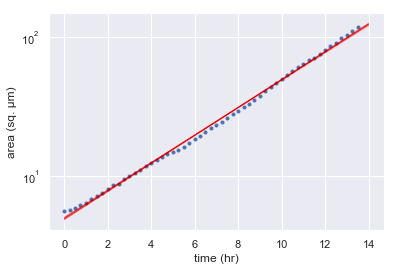

In [32]:
_ = plt.semilogy(t, bac_area, linestyle = 'none', marker = '.')
#generating x values for the bootstrap sample
t_bs = np.array([0,14])
#plotting the first 100 bootstrap line
for i in range(100):
    y = np.exp(growth_rate_bs_reps[i]*t_bs + log_intercept_reps[i])
    _ = plt.semilogy(t_bs, y, linewidth = 0.5, alpha = 0.05, color = 'red')
    
#Label x and y axes
_ = plt.xlabel('time (hr)')
_ = plt.ylabel('area (sq. µm)')
plt.show()

from above plot we can see that bootstrap replicate does not deviate much